## Problem 1: Forecasting

Using historical world trade data from 1946-2016 create a forecasting model with Arima using data from 60% of data for training and 40% for testing. Check for seasonality.







In [1]:
# Load the Relevant libraries
import sklearn as sk
import urllib
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.ticker as ticker

%matplotlib inline

# URL for the World trade Data (UW Repository)
file_wtd = "WorldTrade.csv"
data = pd.read_csv(file_wtd)
print(data.groupby("year").agg("count"))

      series_type  table_type  table_type_desc  country_code  country_type  \
year                                                                         
1946            2           2                2             2             2   
1947            2           2                2             2             2   
1948           12          12               12            12            12   
1949           12          12               12            12            12   
1950           14          14               14            14            14   
1951           14          14               14            14            14   
1952           14          14               14            14            14   
1953           14          14               14            14            14   
1954           14          14               14            14            14   
1955           14          14               14            14            14   
1956           15          15               15            15    

In [2]:
# Filter only on Japan Imports
cond = (data['country_english_name']=='Japan') & (data['trade_flow_desc']=='Imports')
japan = data.loc[cond, ['period_in_date', 'value', 'year']]

japan['datetime'] = pd.to_datetime(japan['period_in_date'])
japan = japan.drop(['period_in_date'], axis=1).sort_values('datetime', ascending=True).reset_index(drop=True)

# Set datetime as index
japan = japan.set_index('datetime')

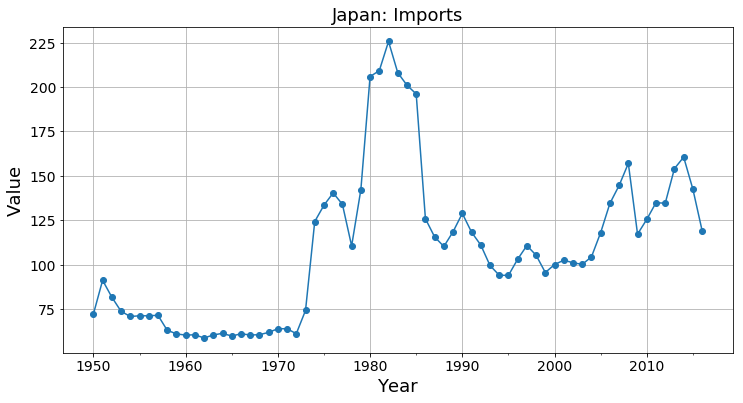

In [3]:
# Plot Japan Imports for each year. Note value of units not given. However, we know that it's fixed to 2000.
# So, the exact units should not matter.

fig,ax = plt.subplots(figsize=(12,6))
ax.plot(japan['year'], japan['value'], marker='o')

ax.set_ylabel('Value', size=18)
ax.set_xlabel('Year', size=18)

ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))

ax.set_title("Japan: Imports", size=18)

ax.grid(True)
plt.show()

In [4]:
from pandas.plotting import autocorrelation_plot

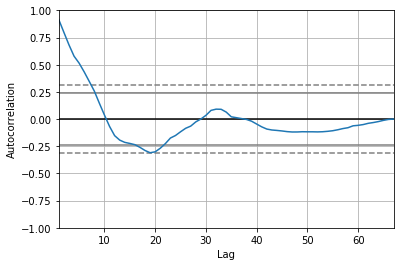

In [5]:
# Autocorrelation plot. There is a positive correlation for the first 10 lags,
# but it is probably only significant for the first 5 lags. We will use 5 lags in our AR model.
autocorrelation_plot(japan['value'])

In [6]:
from statsmodels.tsa.arima_model import ARIMA

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   66
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -275.500
Method:                       css-mle   S.D. of innovations             15.656
Date:                Mon, 15 Jul 2019   AIC                            565.001
Time:                        01:59:38   BIC                            580.328
Sample:                    01-01-1951   HQIC                           571.057
                         - 01-01-2016                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.7548      2.230      0.339      0.736      -3.615       5.125
ar.L1.D.value     0.2822      0.121      2.324      0.024       0.044       0.520
ar.L2.D.value    -0.0884      0.122     

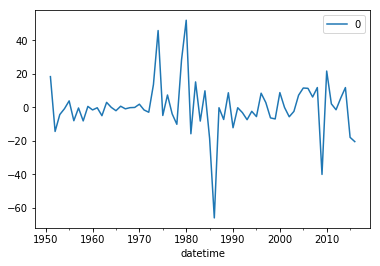

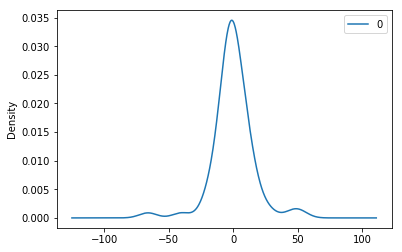

               0
count  66.000000
mean   -0.060813
std    15.816397
min   -66.132216
25%    -5.676172
50%    -0.389214
75%     6.901475
max    51.956575


In [7]:
# Fit the model
model = ARIMA(japan['value'], order=(5,1,0), freq=pd.infer_freq(japan.index))
model_fit = model.fit(disp=0)

# Print model summary
print(model_fit.summary())

# Plot residual errors over time. No obvious trend over the years, though a few major errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

# Plot residual errors
residuals.plot(kind='kde')
plt.show()

# Describe residual errors. Small mean indicating bias or trend is probably small.
print(residuals.describe())

In [8]:
from sklearn.metrics import mean_squared_error

In [9]:
# Create test and train set using 60% for training
X = japan['value']
size = int(X.shape[0] * 0.6)
train, test = X[0:size], X[size:]

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

predicted=147.002952, expected=128.800729
predicted=114.815256, expected=118.249770
predicted=113.972353, expected=111.012892
predicted=106.690387, expected=99.508458
predicted=96.011915, expected=94.011798
predicted=99.238514, expected=93.893868
predicted=93.445138, expected=103.018753
predicted=107.794305, expected=110.688334
predicted=111.723908, expected=105.280247
predicted=102.257198, expected=95.526068
predicted=90.622525, expected=100.000000
predicted=103.001318, expected=102.477907
predicted=106.959203, expected=101.012817
predicted=102.195052, expected=100.118055
predicted=96.519754, expected=104.306823
predicted=106.766605, expected=117.994214
predicted=123.911964, expected=134.404906
predicted=139.662138, expected=144.523036
predicted=146.588044, expected=156.952090
predicted=159.480161, expected=117.119024
predicted=103.108172, expected=125.457292
predicted=131.742523, expected=134.846516
predicted=136.964879, expected=134.522836
predicted=149.596215, expected=154.028935
p

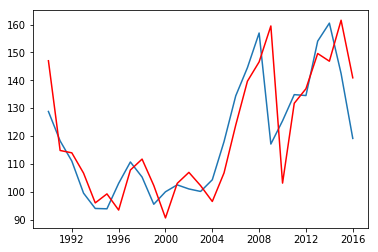

In [10]:
# Create predictions for n+1 step from n history steps
history = [x for x in train]
predictions = []
for t in test.index:
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0][0]
    predictions.append([t, yhat])
    obs = test.loc[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
pred = pd.DataFrame(data=predictions, columns=['datetime', 'value'])
pred = pred.set_index('datetime')

error = mean_squared_error(test, pred)
print('Test MSE: %.3f' % error)

# Plot test vs prediction
plt.plot(test)
plt.plot(pred, color='red')
plt.show()

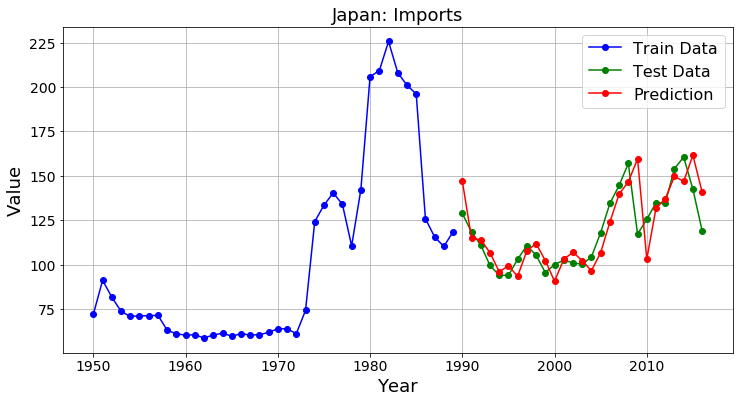

In [11]:
# Plot train, test, and prediction data. Prediction is very good, though it appears to be shifted to the right from test data.
# This might indicate ARIMA is just using value at t as a prediction for t+1 (plus some small change)

fig,ax = plt.subplots(figsize=(12,6))
ax.plot(train, marker='o', label='Train Data', color='blue')
ax.plot(test, marker='o', label='Test Data', color='green')
ax.plot(pred, marker='o', label='Prediction', color='red')

ax.set_ylabel('Value', size=18)
ax.set_xlabel('Year', size=18)

ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

leg = ax.legend(fontsize=16)

ax.set_title("Japan: Imports", size=18)

ax.grid(True)
plt.show()

**The data is only reported annually, so there is no way to test for seasonality.** 

## Problem 2: Ethical Issues

The scoring model based on the dataset described in the ProPubica paper is most certainly biased against the African Americans and other populations. How would you create a system that is less biased against such populations?

Machine learning models, and models of any kind, are only ever as good as the data used to create them. Therefore, if the data feeding the models are biased, then the models will pick up, learn, and reflect those biases. As such, simply collecting more of the same data will not lead to less biased models. One way to lessen bias is to collect data more from subgroups being discriminated against. Usually, the bias is in favor of the majority (sex/race/etc.). With more data from the underrepresented groups can significantly reduce bias. It's also important to keep in mind context in which data was collected and whether or not there are any missing features that may not be important for the majority class but may be crucial for the populations against which you are trying to reduce bias.

## Problem 3: Explanations

Using the classifier from any previous assignment extract explanations from 2 positive and 2 negative predictions using the LIME (Locally Interpretable Model agnostic Explanations) model.

In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

import lime
import lime.lime_tabular

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

iris = load_iris()

In [13]:
train, test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.30)

In [14]:
# Instantiate learning model (k = 2)
clf = KNeighborsClassifier(n_neighbors=2)

# Fitting the model using only Petal.Width and Petal.Length
clf.fit(train, y_train)

# Predicting the Test set results
y_pred = clf.predict(test)

In [15]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print("Accuracy Score = %.3f" % (accuracy_score(y_test, y_pred)))

[[15  0  0]
 [ 0 13  1]
 [ 0  1 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        14
           2       0.94      0.94      0.94        16

   micro avg       0.96      0.96      0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Accuracy Score = 0.956


In [16]:
explainer = lime.lime_tabular.LimeTabularExplainer(train, feature_names=iris.feature_names, 
                                                   class_names=iris.target, verbose=True, discretize_continuous=True)

In [17]:
i = 25
exp = explainer.explain_instance(test[i], clf.predict_proba, num_features=4)

Intercept 0.3478018322224217
Prediction_local [0.74018826]
Right: 1.0


In [18]:
exp.show_in_notebook(show_table=True)

In [19]:
exp.as_list()

[('4.30 < petal length (cm) <= 5.00', 0.452821926160604),
 ('2.80 < sepal width (cm) <= 3.00', -0.034283704087506556),
 ('1.30 < petal width (cm) <= 1.80', -0.016069678745701966),
 ('5.80 < sepal length (cm) <= 6.40', -0.010082120134927028)]